## Ankunftsprozess

In diesem Abschnitt wird der Ankunftsprozess der EVs auf dem Parkplatz untersucht.
Zunächst wird zu Vergleichszwecken weiterhin ein mittels eines Zufallsgenerators mit gleichverteilung bestimmt, ob ein neues Auto auf dem Parkplatz erscheint.
Später wird mit dem Poisson-Prozess bestimmt, wie oft ein neues Auto auf dem Parkplatz lädt.
Weiterhin wird implementiert, ob nur während der Öffnungszeiten des Supermarktes, oder auch außerhalb dieser Zeiten geladen werden kann

soc_begin:  gauss , [44.67458609]
soc_begin:  gauss , [34.5982722]
'VW_ID3_Pure_45kWh' charged 32.14 kWh to 100.08 % SOC
'Porsche_Taycan' charged 61.72 kWh to 100.68 % SOC
soc_begin:  gauss , [46.37049459]
'Tesla_Model3_LR' charged 44.32 kWh to 100.09 % SOC
soc_begin:  gauss , [44.97105529]
soc_begin:  gauss , [49.14739648]
soc_begin:  gauss , [39.92960653]
soc_begin:  gauss , [44.09047834]
'Porsche_Taycan' charged 42.76 kWh to 85.71 % SOC
soc_begin:  gauss , [42.84389748]
soc_begin:  gauss , [48.7958069]
Alle Ladesäulen belegt. Abgewiesene EVs:  1
'Tesla_Model_SX_LR' charged 48.11 kWh to 92.20 % SOC
'Porsche_Taycan' charged 48.13 kWh to 100.68 % SOC
'VW_ID3_Pure_45kWh' charged 32.01 kWh to 100.16 % SOC
'Tesla_Model3_LR' charged 47.27 kWh to 100.14 % SOC
soc_begin:  gauss , [35.75270915]
'Porsche_Taycan' charged 60.65 kWh to 100.69 % SOC
soc_begin:  gauss , [46.25044049]
soc_begin:  gauss , [56.09703957]
'2021_FIAT_500e_Hatchback' charged 20.66 kWh to 95.43 % SOC
'Tesla_Model_SX_LR' ch

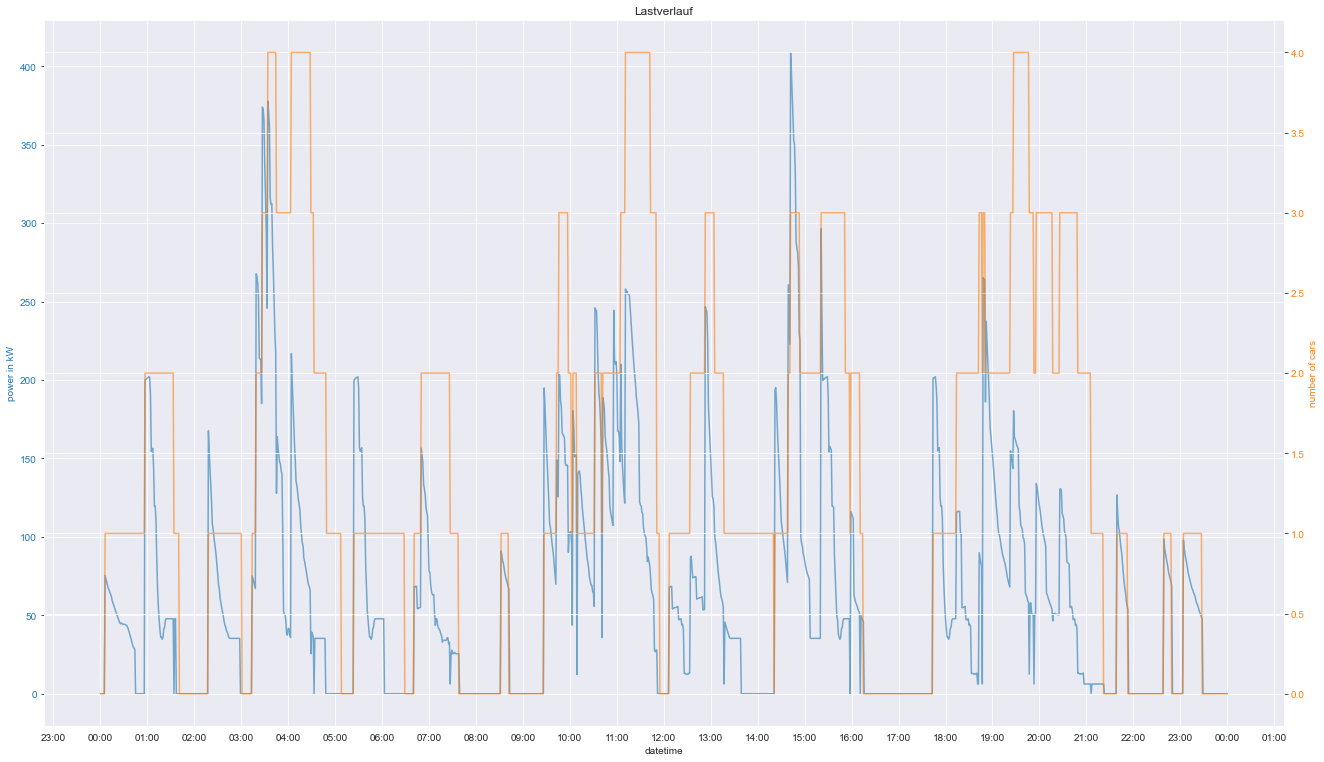

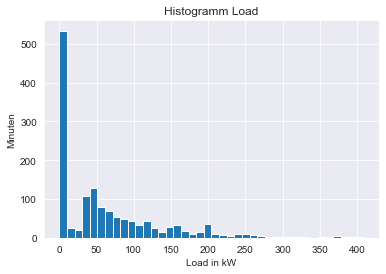

In [1]:
import importlib
import numpy as np
import model_v2

importlib.reload(model_v2)

df_results_returned = model_v2.simulation("settings_soc_begin.json")
model_v2.plot(df_results_returned)

<AxesSubplot:xlabel='power_per_minute', ylabel='Proportion'>

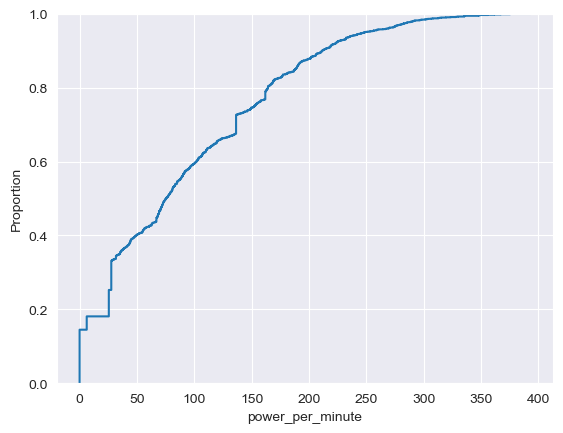

In [8]:
import seaborn as sns
sns.ecdfplot(data=df_results_returned, x="power_per_minute")

In [10]:
importlib.reload(model_v2)
model_v2.auswertung(df_results_returned)
df_results_returned.describe()

Maximale Last:  393.2959718683373 kWh
Minuten über 60% der maximalen Last (235.98 kWh): 89 Entsprechen  6.18 %
Minuten über 70% der maximalen Last (275.31 kWh): 50 Entsprechen  3.47 %
Minuten über 80% der maximalen Last (314.64 kWh): 16 Entsprechen  1.11 %
Minuten über 90% der maximalen Last (353.97 kWh): 5 Entsprechen  0.35 %
Minuten über 95% der maximalen Last (373.63 kWh): 2 Entsprechen  0.14 %


,power_per_minute,number_cars_charging
count,1441.000000,1441.000000
mean,94.000577,1.712006
std,82.399057,1.186581
min,0.000000,0.000000
25%,25.485511,1.000000
50%,75.429977,1.000000
75%,152.466073,3.000000
max,393.295972,4.000000


## Poisson-Prozess

Ab hier wird für den Ankunftsprozess mit dem Poisson-Prozess gearbeitet

In [22]:
def generate_arrival(lambda_val):
    return np.random.poisson(lambda_val)

def simulate_day(lambda_val, simulation_duration):
    parking_lot_capacity = 10  # Beispielkapazität des Parkplatzes
    parking_lot = [0] * parking_lot_capacity  # 0 bedeutet, dass der Parkplatz leer ist

    for minute in range(simulation_duration):
        new_cars = generate_arrival(lambda_val)

        for _ in range(new_cars):
            if 1 not in parking_lot:  # Überprüfen, ob es freie Parkplätze gibt
                print(f"Neues Auto ist angekommen in Minute {minute}, aber kein Platz verfügbar.")
            else:
                available_parking = [i for i, val in enumerate(parking_lot) if val == 0]
                parking_spot = np.random.choice(available_parking)
                parking_lot[parking_spot] = 1
                print(f"Neues Auto ist in Minute {minute} angekommen und hat einen Parkplatz gefunden.")

    print("Simulation abgeschlossen.")

# Parameter für die Simulation
average_arrival_rate = (0.5/60)  # Durchschnittliche Ankunftsrate pro Stunde
simulation_duration = 24 * 60  # Simulationsdauer in Minuten für einen Tag

# Simulation starten
simulate_day(average_arrival_rate, simulation_duration)

Neues Auto ist angekommen in Minute 122, aber kein Platz verfügbar.
Neues Auto ist angekommen in Minute 376, aber kein Platz verfügbar.
Neues Auto ist angekommen in Minute 393, aber kein Platz verfügbar.
Neues Auto ist angekommen in Minute 403, aber kein Platz verfügbar.
Neues Auto ist angekommen in Minute 469, aber kein Platz verfügbar.
Neues Auto ist angekommen in Minute 554, aber kein Platz verfügbar.
Neues Auto ist angekommen in Minute 582, aber kein Platz verfügbar.
Neues Auto ist angekommen in Minute 702, aber kein Platz verfügbar.
Neues Auto ist angekommen in Minute 718, aber kein Platz verfügbar.
Neues Auto ist angekommen in Minute 852, aber kein Platz verfügbar.
Neues Auto ist angekommen in Minute 989, aber kein Platz verfügbar.
Neues Auto ist angekommen in Minute 1065, aber kein Platz verfügbar.
Neues Auto ist angekommen in Minute 1211, aber kein Platz verfügbar.
Simulation abgeschlossen.


soc_begin:  gauss , [41.33607582]
soc_begin:  gauss , [20.7117784]
'Porsche_Taycan' charged 53.83 kWh to 98.97 % SOC
soc_begin:  gauss , [45.05474475]
'Porsche_Taycan' charged 26.87 kWh to 73.82 % SOC
'Hyundai_IONIQ5_LongRange' charged 57.62 kWh to 100.08 % SOC
soc_begin:  gauss , [26.64336294]
soc_begin:  gauss , [41.06700083]
soc_begin:  gauss , [33.84154054]
soc_begin:  gauss , [39.99854075]
soc_begin:  gauss , [36.4791525]
Alle Ladesäulen belegt. Abgewiesene EVs:  1
'2021_FIAT_500e_Hatchback' charged 24.77 kWh to 100.05 % SOC
'Tesla_ModelY' charged 54.33 kWh to 100.09 % SOC
'Tesla_Model3_LR' charged 49.76 kWh to 100.31 % SOC
soc_begin:  gauss , [48.08095357]
soc_begin:  gauss , [41.64395861]
soc_begin:  gauss , [28.52428231]
soc_begin:  gauss , [23.11295436]
Alle Ladesäulen belegt. Abgewiesene EVs:  2
'Tesla_ModelY' charged 35.75 kWh to 85.24 % SOC
'Tesla_Model_SX_LR' charged 45.66 kWh to 74.19 % SOC
'VW_ID3_Pure_45kWh' charged 42.97 kWh to 100.74 % SOC
'VW_ID3_Pure_45kWh' charged 

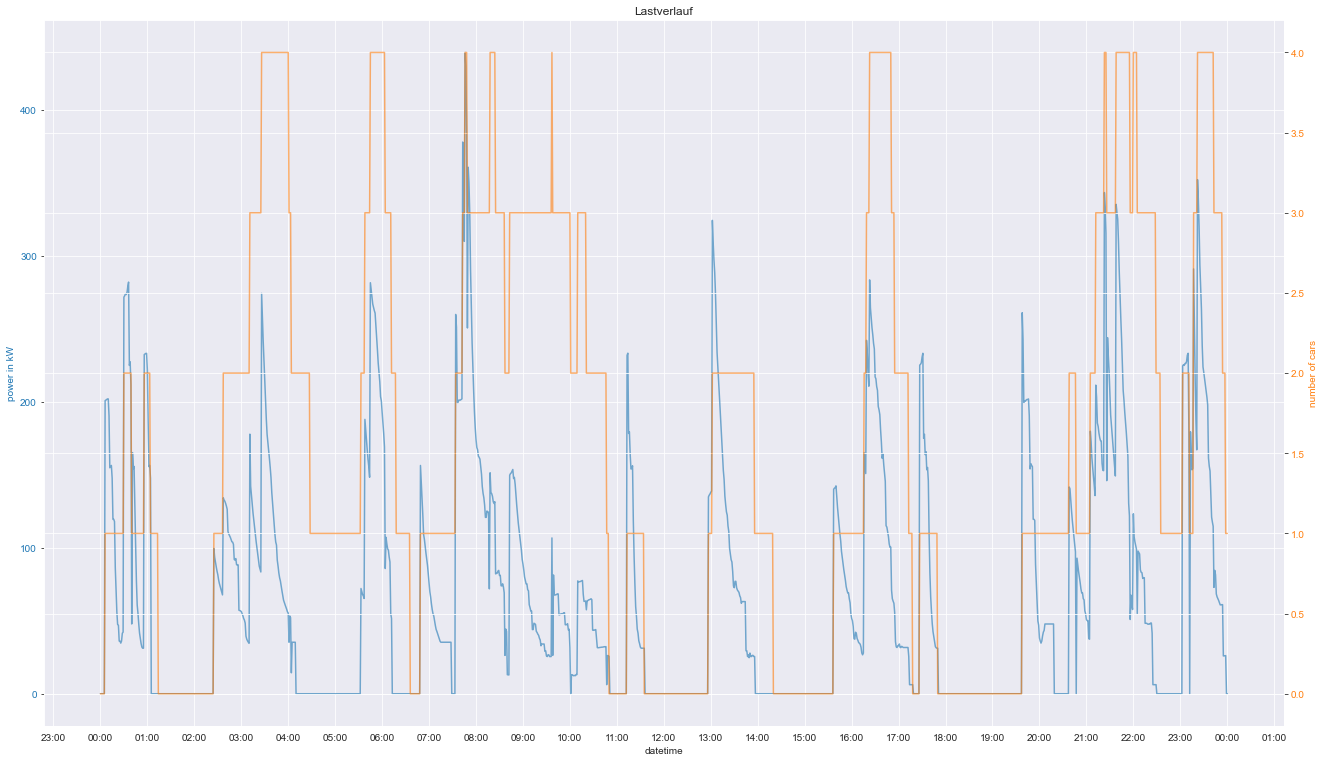

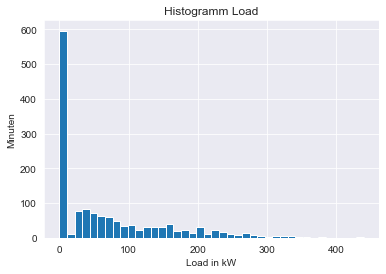

In [2]:
importlib.reload(model_v2)

df_results_returned_poisson = model_v2.simulation("settings_soc_begin.json")
model_v2.plot(df_results_returned_poisson)

<AxesSubplot:xlabel='power_per_minute', ylabel='Proportion'>

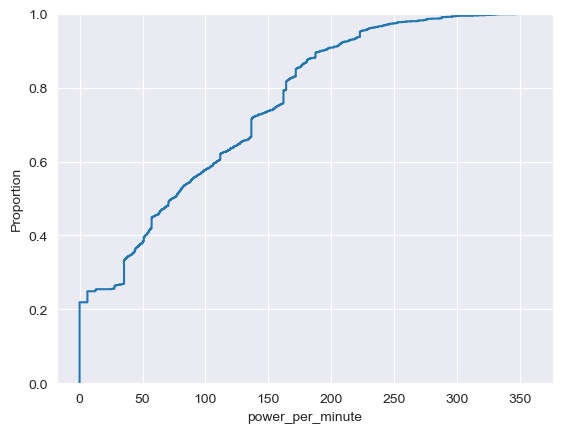

In [34]:
import seaborn as sns
sns.ecdfplot(data=df_results_returned_poisson, x="power_per_minute")

In [35]:
importlib.reload(model_v2)
model_v2.auswertung(df_results_returned_poisson)
df_results_returned_poisson.describe()

Maximale Last:  358.28255867771486 kWh
Minuten über 60% der maximalen Last (214.97 kWh): 103 Entsprechen  7.15 %
Minuten über 70% der maximalen Last (250.80 kWh): 37 Entsprechen  2.57 %
Minuten über 80% der maximalen Last (286.63 kWh): 18 Entsprechen  1.25 %
Minuten über 90% der maximalen Last (322.45 kWh): 6 Entsprechen  0.42 %
Minuten über 95% der maximalen Last (340.37 kWh): 2 Entsprechen  0.14 %


,power_per_minute,number_cars_charging
count,1441.000000,1441.000000
mean,90.151756,1.565579
std,77.764175,1.243330
min,0.000000,0.000000
25%,12.398335,1.000000
50%,73.467209,1.000000
75%,156.847992,2.000000
max,358.282559,4.000000


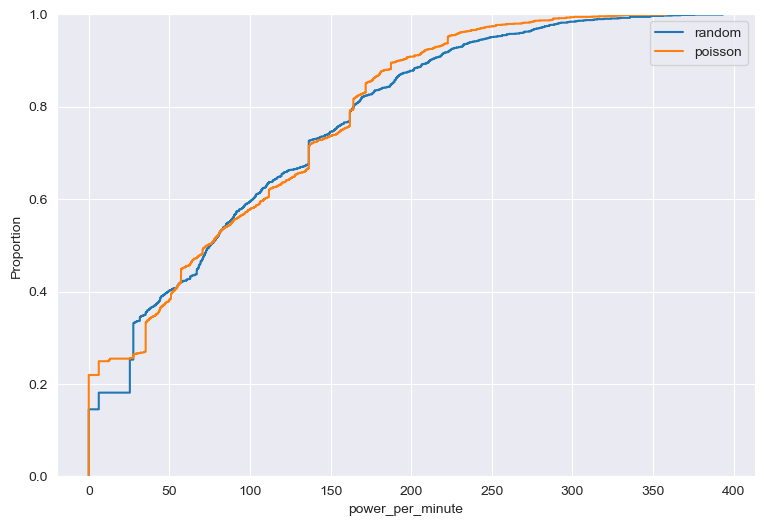

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 6))

sns.ecdfplot(data=df_results_returned, x="power_per_minute", label="random")
sns.ecdfplot(data=df_results_returned_poisson, x="power_per_minute", label = "poisson")

plt.legend()
plt.show()